1) Исследовать, аппроксимировать Э, Г
2) Задать параметрически
3) Найти уравнение касат. в $(x_0, y_0)$. Э: $t \in [0; 2 \Pi]$. Разбить на n участков. В середине каждого участка построить отрезок касательной. Из отрезков смоделировать кривую
4) Найти эволюту Э. Построить

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 5, 3

def ellipse(t):
    return a * np.cos(t), b * np.sin(t)

def tangent_line_ellipse(t0, a, b):
    x0, y0 = ellipse(t0)
    dx_dt = -a * np.sin(t0)
    dy_dt = b * np.cos(t0)
    slope = dy_dt / dx_dt # m - угловой коэффициент касательной
    return lambda t: slope * (t - x0) + y0 # y - y_0 = m * (x - x_0)

t_values = np.linspace(0, 2 * np.pi, 1000)
x_ellipse, y_ellipse = ellipse(t_values)

plt.figure(figsize=(10, 5))
plt.plot(x_ellipse, y_ellipse, label='Эллипс')

n = 10
t_segments = np.linspace(0, 2 * np.pi, n + 1)

for i in range(n):
    t_mid = (t_segments[i] + t_segments[i + 1]) / 2 # середину находим
    tangent = tangent_line_ellipse(t_mid, a, b)
    x0, y0 = ellipse(t_mid)
    x_tangent = np.linspace(x0 - 1, x0 + 1, 10) # Задаем значения x, y по прямой (задаем для прорисовки)
    y_tangent = tangent(x_tangent)
    plt.plot(x_tangent, y_tangent, 'r--')

plt.title('Эллипс с касательными')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
# Википедия https://ru.wikipedia.org/wiki/Эволюта
def evolute(t):
    x, y = ellipse(t)
    dx_dt = -a * np.sin(t)
    dy_dt = b * np.cos(t)
    dx_dt_2 = -a * np.cos(t)
    dy_dt_2 = -b * np.sin(t)
    x_evolute = x - dy_dt * (dx_dt**2 + dy_dt**2) / (dx_dt * dy_dt_2 - dx_dt_2 * dy_dt)
    y_evolute = y + dx_dt * (dx_dt**2 + dy_dt**2) / (dx_dt * dy_dt_2 - dx_dt_2 * dy_dt)
    return x_evolute, y_evolute

x_evolute, y_evolute = evolute(t_values)

plt.figure(figsize=(10, 5))
plt.plot(x_ellipse, y_ellipse, label='Эллипс')
plt.plot(x_evolute, y_evolute, label='Эволюта', linestyle='--')
plt.title('Эллипс и его эволюта')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Для выбранных двух кривых:
- Найти параметрическое задание
- построить уравнение касательной и нормами в точке $(x(t_0), y(t_0))$
- Найти кривизну в точке $(x(t_0), y(t_0))$

Кривые
1) спираль (архимедова, логарифмическая, гиперболическая)
2) гипоциклоида
3) лемниската

Выбираю
- Архимедову спираль ($x = a t \cos{t}$, $y = a t \sin{t}$)
- Гипоциклоида ($x(t) = (R - r) \cdot \cos(t) + r \cdot \cos\left(\frac{R - r}{r} \cdot t\right)$, $y(t) = (R - r) \cdot \sin(t) - r \cdot \sin\left(\frac{R - r}{r} \cdot t\right)$)

Производные для спирали:
- $x'(t) = a (\cos{t} - t \sin{t})$
- $y'(t) = a (\sin{t} + t \cos{t})$
- $x''(t) = a (-2\sin{t} - t \cos{t})$
- $y''(t) = a (2\cos{t} - t \sin{t})$

Производные для лемнискаты Бернулли
- $\frac{d^2x}{dt^2} = -(R - r) \cdot \cos(t) - \frac{(R - r)^2}{r} \cdot \cos\left(\frac{R - r}{r} \cdot t\right)$
- $\frac{dy}{dt} = (R - r) \cdot \cos(t) - (R - r) \cdot \cos\left(\frac{R - r}{r} \cdot t\right)$
- $\frac{d^2x}{dt^2} = -(R - r) \cdot \cos(t) - \frac{(R - r)^2}{r} \cdot \cos\left(\frac{R - r}{r} \cdot t\right)$
- $\frac{d^2y}{dt^2} = -(R - r) \cdot \sin(t) + \frac{(R - r)^2}{r} \cdot \sin\left(\frac{R - r}{r} \cdot t\right)$

Кривизна ($\kappa$) в точке ($t = t_0$) вычисляется по формуле:
$$
\kappa = \frac{\left| \frac{dx}{dt} \cdot \frac{d^2y}{dt^2} - \frac{dy}{dt} \cdot \frac{d^2x}{dt^2} \right|}{\left( \left( \frac{dx}{dt} \right)^2 + \left( \frac{dy}{dt} \right)^2 \right)^{3/2}}$$


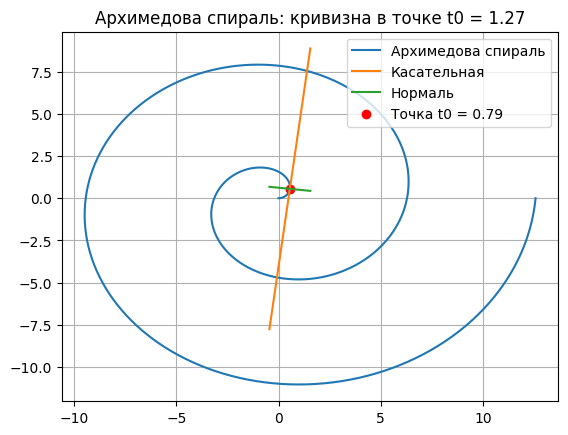

In [10]:
# Архимедова спираль

import numpy as np
import matplotlib.pyplot as plt

# Параметры
a = 1  # Константа
t0 = np.pi / 4  # Точка t0

# Параметрическое задание
t = np.linspace(0, 4 * np.pi, 1000)
x = a * t * np.cos(t)
y = a * t * np.sin(t)

# Уравнение касательной в точке t0
x0 = a * t0 * np.cos(t0)
y0 = a * t0 * np.sin(t0)
dx_dt0 = a * (np.cos(t0) - t0 * np.sin(t0))
dy_dt0 = a * (np.sin(t0) + t0 * np.cos(t0))

# Уравнение касательной: (y - y0) = (dy_dt0 / dx_dt0) * (x - x0)
tangent_x = np.linspace(x0 - 1, x0 + 1, 100)
tangent_y = y0 + (dy_dt0 / dx_dt0) * (tangent_x - x0)

# Уравнение нормали: (y - y0) = -(dx_dt0 / dy_dt0) * (x - x0)
normal_x = np.linspace(x0 - 1, x0 + 1, 100)
normal_y = y0 - (dx_dt0 / dy_dt0) * (normal_x - x0)

# Вторые производные
d2x_dt2 = a * (-2 * np.sin(t0) - t0 * np.cos(t0))
d2y_dt2 = a * (2 * np.cos(t0) - t0 * np.sin(t0))

# Кривизна в точке t0
numerator = np.abs(dx_dt0 * d2y_dt2 - dy_dt0 * d2x_dt2)
denominator = (dx_dt0**2 + dy_dt0**2)**(3/2)
curvature = numerator / denominator

# Визуализация
plt.plot(x, y, label='Архимедова спираль')
plt.plot(tangent_x, tangent_y, label='Касательная')
plt.plot(normal_x, normal_y, label='Нормаль')
plt.scatter(x0, y0, color='red', label=f'Точка t0 = {t0:.2f}')
plt.legend()
plt.grid(True)
plt.title(f'Архимедова спираль: кривизна в точке t0 = {curvature:.2f}')
plt.show()

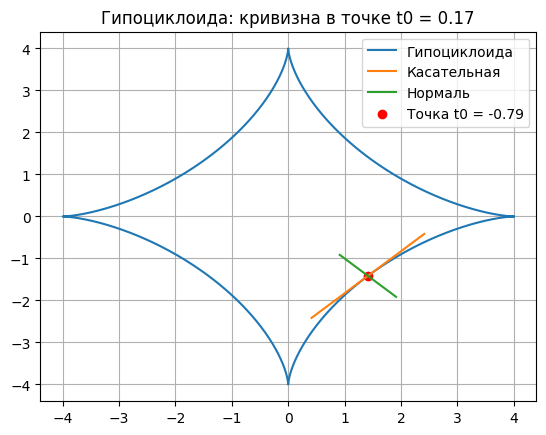

In [41]:
# Гипоциклоида

import numpy as np
import matplotlib.pyplot as plt

# Параметры
R = 4  # Радиус неподвижной окружности
r = 1  # Радиус катящейся окружности
t0 = - np.pi / 4 # Точка t0

# Параметрическое задание
t = np.linspace(0, 2 * np.pi, 1000)
x = (R - r) * np.cos(t) + r * np.cos((R - r) / r * t)
y = (R - r) * np.sin(t) - r * np.sin((R - r) / r * t)

# Первые производные
dx_dt = -(R - r) * np.sin(t) - (R - r) * np.sin((R - r) / r * t)
dy_dt = (R - r) * np.cos(t) - (R - r) * np.cos((R - r) / r * t)

# Вторые производные
d2x_dt2 = -(R - r) * np.cos(t0) - (R - r)**2 / r * np.cos((R - r) / r * t0)
d2y_dt2 = -(R - r) * np.sin(t0) + (R - r)**2 / r * np.sin((R - r) / r * t0)

# Уравнение касательной в точке t0
x0 = (R - r) * np.cos(t0) + r * np.cos((R - r) / r * t0)
y0 = (R - r) * np.sin(t0) - r * np.sin((R - r) / r * t0)
dx_dt0 = -(R - r) * np.sin(t0) - (R - r) * np.sin((R - r) / r * t0)
dy_dt0 = (R - r) * np.cos(t0) - (R - r) * np.cos((R - r) / r * t0)

# Уравнение касательной: (y - y0) = (dy_dt0 / dx_dt0) * (x - x0)
tangent_x = np.linspace(x0 - 1, x0 + 1, 100)
tangent_y = y0 + (dy_dt0 / dx_dt0) * (tangent_x - x0)

# Уравнение нормали: (y - y0) = -(dx_dt0 / dy_dt0) * (x - x0)
normal_x = np.linspace(x0 - 0.5, x0 + 0.5, 100)
normal_y = y0 - (dx_dt0 / dy_dt0) * (normal_x - x0)

# Кривизна в точке t0
numerator = np.abs(dx_dt0 * d2y_dt2 - dy_dt0 * d2x_dt2)
denominator = (dx_dt0**2 + dy_dt0**2)**(3/2)
curvature = numerator / denominator

# Визуализация
plt.plot(x, y, label='Гипоциклоида')
plt.plot(tangent_x, tangent_y, label='Касательная')
plt.plot(normal_x, normal_y, label='Нормаль')
plt.scatter(x0, y0, color='red', label=f'Точка t0 = {t0:.2f}')
plt.legend()
plt.grid(True)
plt.title(f'Гипоциклоида: кривизна в точке t0 = {curvature:.2f}')
plt.show()